# 3. Wann werden die meisten Produkte verkauft?**
- Analysieren Sie die zeitliche Verteilung der Verkäufe.
- Ermitteln Sie den durchschnittlichen Zeitpunkt für den Verkauf von Produkten.
- Untersuchen Sie, ob es bestimmte Zeiträume gibt, in denen bestimmte Produkte oder Marken besonders häufig verkauft werden


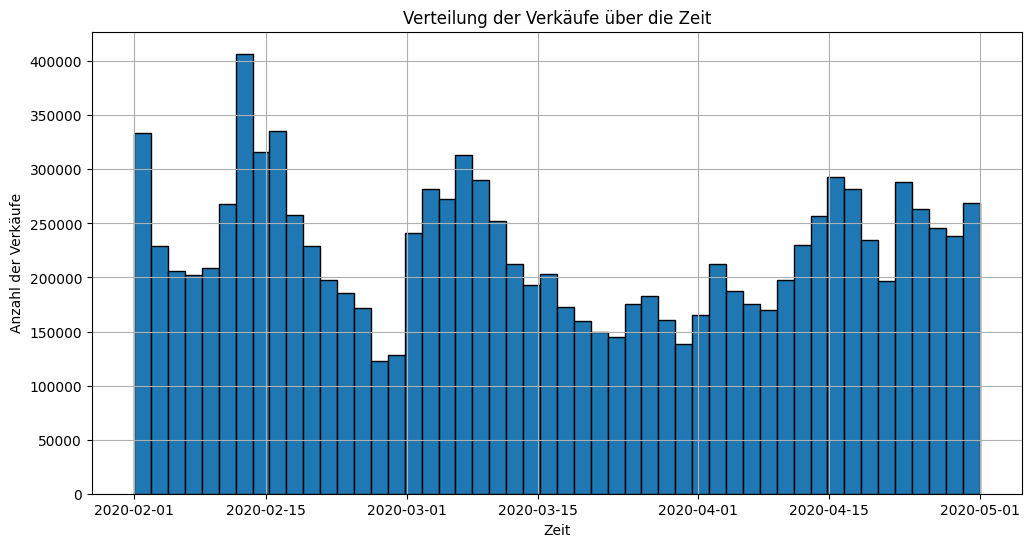

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Daten laden
data = pd.read_csv("C:\\Users\\mihab\\OneDrive\\Desktop\\Uni\\Ordner\\Uni\\3-Sem\BD\\cleaned_ecommerce_sorted.csv")

# Spalte event_time in datetime konvertieren
data['event_time'] = pd.to_datetime(data['event_time'])

# Histogramm erstellen
plt.figure(figsize=(12, 6))
data['event_time'].hist(bins=50, edgecolor='black')
plt.title('Verteilung der Verkäufe über die Zeit')
plt.xlabel('Zeit')
plt.ylabel('Anzahl der Verkäufe')
plt.show()


In [7]:
average_sale_time = data['event_time'].mean()
print(f'Durchschnittlicher Zeitpunkt für den Verkauf: {average_sale_time}')

Durchschnittlicher Zeitpunkt für den Verkauf: 2020-03-15 23:35:02.069411328+00:00


Ähnliche Analysen können für Produkte und andere Kategorien durchgeführt werden.

In [8]:
sales_by_brand = data.groupby(['brand'])['event_time'].count()
print('Anzahl der Verkäufe nach Marke:')
print(sales_by_brand)

Anzahl der Verkäufe nach Marke:
brand
a-case      8438
a-derma      128
a-elita       13
a-mega        41
a-toys         3
            ... 
zugo          11
zuru           4
zvezda         1
zwilling       2
zyxel         32
Name: event_time, Length: 3852, dtype: int64


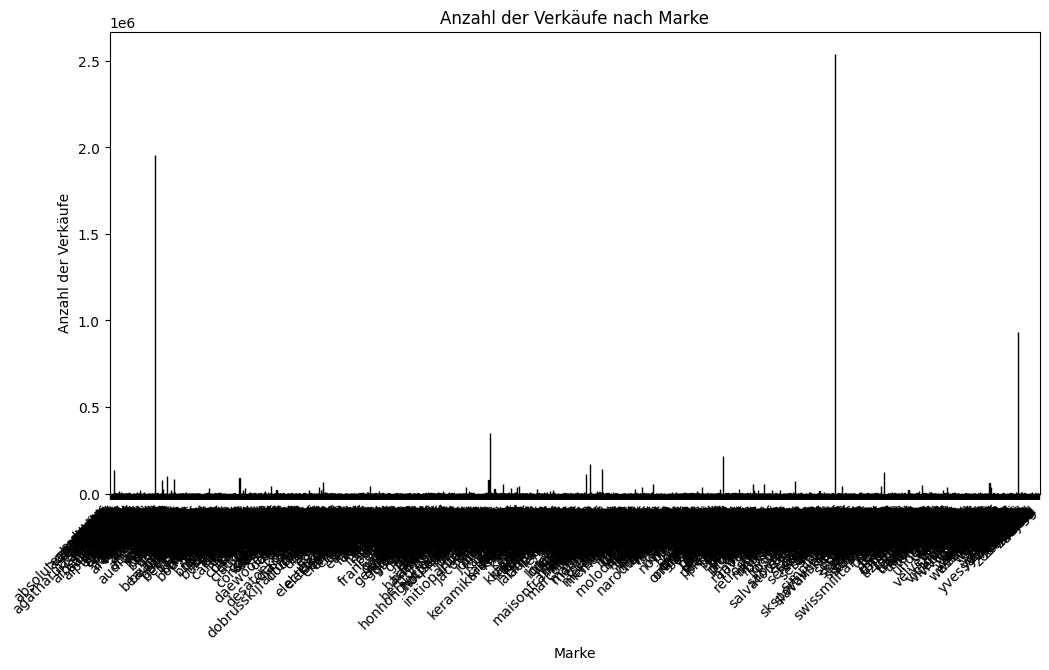

In [9]:
import matplotlib.pyplot as plt

# Daten gruppieren
sales_by_brand = data.groupby(['brand'])['event_time'].count()

# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
sales_by_brand.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Anzahl der Verkäufe nach Marke')
plt.xlabel('Marke')
plt.ylabel('Anzahl der Verkäufe')
plt.xticks(rotation=45, ha='right')  # Rotiere die Markennamen für bessere Lesbarkeit
plt.show()

# Mit seaborn ein Balkendiagramm erstellen ist noch schlimmer dargestellt

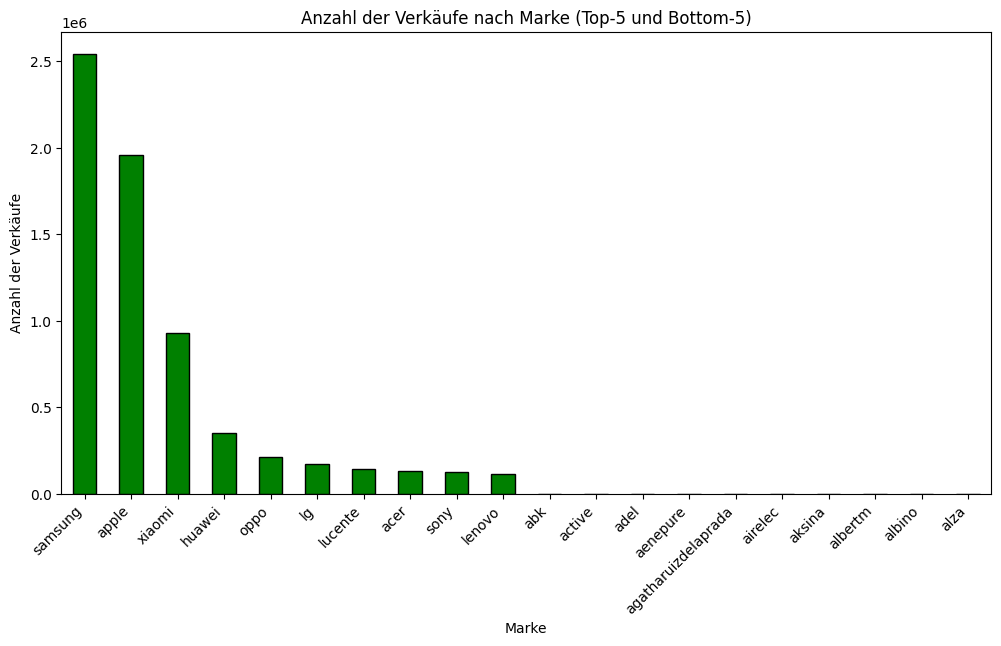

In [16]:
# die Top-5 und Bottom-5 Marken auswählen 
import matplotlib.pyplot as plt

# Daten gruppieren
sales_by_brand = data.groupby(['brand'])['event_time'].count()

# Top- und Bottom-N-Marken auswählen
top_n = 10
bottom_n = 10
top_brands = sales_by_brand.nlargest(top_n)
bottom_brands = sales_by_brand.nsmallest(bottom_n)
top_bottom_brands = pd.concat([top_brands, bottom_brands])

# Balkendiagramm erstellen
plt.figure(figsize=(12, 6))
top_bottom_brands.plot(kind='bar', color=['green' if x in top_brands.index else 'red' for x in top_bottom_brands.index], edgecolor='black')
plt.title('Anzahl der Verkäufe nach Marke (Top-5 und Bottom-5)')
plt.xlabel('Marke')
plt.ylabel('Anzahl der Verkäufe')
plt.xticks(rotation=45, ha='right')
plt.show()
